<a href="https://colab.research.google.com/github/RAIANKIT07/YES-Bank-Stock-Closing-Price-Supervised-ML-Regression-/blob/main/Yes_Bank_Closing_stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capstone Project 2 - Yes Bank Stock Closing Price Prediction

(Supervised - Regression)


Project by  **ANKIT RAI**

#Project Summary

Yes Bank is a well-known banking institution in India. It has been in the headlines since 2018 due to the Rana Kapoor fraud case. Because of this, it was intriguing to see how it affected the company's stock prices and whether Time series models or any other predictive models can do justice to such situations. This dataset contains the bank's monthly stock prices since its inception, including the closing, starting, highest, and lowest stock values for each month. The main goal is to forecast the stock's monthly closing price.
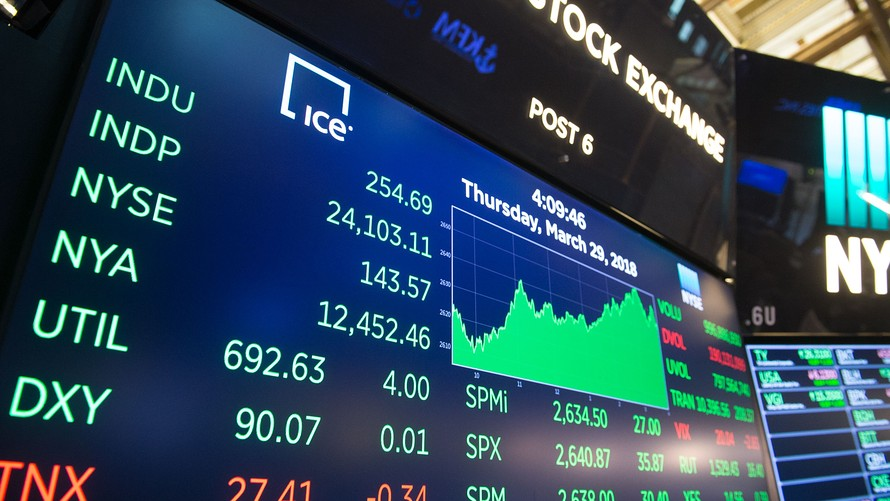

# GitHub Link - https://github.com/RAIANKIT07/YES-Bank-Stock-Closing-Price-Supervised-ML-Regression-.git

#Problem Statement

Yes Bank is a well-known Indian banking organisation. It has been in the news since 2018 because of the Rana Kapoor fraud case.
As a result, it was exciting to examine how it influenced the company's stock values and whether any forecasting algorithms can adequately account for such events. Since its founding, this dataset has contained the bank's monthly stock prices, including the closing, starting, highest, and lowest stock values for each month. The primary purpose is to forecast the monthly closing price of the stock.

#Dataset Description

It is critical to comprehend the data before executing any
operations on it. We examined the dataset after loading it
by inspecting a few of the initial and end rows. We
examined the dataset's form and discovered that it has 185
rows and 5 feature columns.
Let's look at the features in our dataset.
• Date: It denotes the date of the investment (in our case
we have month and year).
• Open: The price at which a stock began trading when the
opening bell rang.

• High: The highest prices in a specific time period are
referred to be high.
• Low: The lowest prices in a certain time period are
referred to as low.
• Close: The price of a single stock at the close.

#Exploratory Data Analysis:-
A) Data Cleaning: The supplied date in data is
transformed to suitable date format of YYYY-MM-DD and
given date column has dtype as object changing it into
date time format.


B) Treatment of null values: Our dataset does not
contain any null values, which can impair our accuracy.
Depending on the situation, we might discard null
numbers or replace them with mean or median values.

C) Visualization of Data:

 Univariate Analysis: All of the parameters in our yes
bank stock market dataset have favourably skewed
distributions.

Bivariate Analysis: When performing a bivariate
analysis by graphing one variable against another in the
setting of supervised learning, it can aid in determining the
essential predictors.
The graphs below show a strong relationship between the
dependent (close) and independent variables.

In [63]:
import numpy as np                                    
warnings.filterwarnings('ignore')                      # do not disturb mode

import numpy as np                                     # numerical computations
import pandas as pd                                    # data manipulations

import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px                       

from datetime import datetime                          # to convert to date
from statsmodels.tsa.arima_model import ARIMA          # to build ARIMA


from dateutil.relativedelta import relativedelta       # working with dates with style
from datetime import datetime                          # computational cost
from scipy.optimize import minimize                    # for function minimization
import copy                                            # create copies

from sklearn.preprocessing import (MinMaxScaler,       # scale the data
StandardScaler)         
from sklearn.model_selection import train_test_split   # split train and test data
from sklearn.model_selection import (cross_val_score,  # split train and test data on a timeseries
TimeSeriesSplit)

from sklearn.linear_model import LinearRegression      # regression model
from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters

from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)

from statsmodels.tsa.stattools import adfuller         # statistics and econometrics
import statsmodels.formula.api as smf                  
import pandas as pd               
import matplotlib.pyplot as plt        
import seaborn as sns              
plt.style.use('seaborn-white')
import plotly.express as px 

import warnings                                    
warnings.filterwarnings('ignore')

from datetime import datetime                     
from statsmodels.tsa.arima_model import ARIMA   

from dateutil.relativedelta import relativedelta
from scipy.optimize import minimize                    
import copy                                            

from sklearn.preprocessing import (MinMaxScaler,       
StandardScaler)         
from sklearn.model_selection import train_test_split   
from sklearn.model_selection import (cross_val_score,  
TimeSeriesSplit)

from sklearn.preprocessing import (MinMaxScaler,       
StandardScaler)         
from sklearn.model_selection import train_test_split   
from sklearn.model_selection import (cross_val_score,  
TimeSeriesSplit)

from sklearn.linear_model import LinearRegression      
from xgboost import XGBRegressor                       
from sklearn.ensemble import RandomForestRegressor     
from sklearn.svm import SVR                            
from sklearn.linear_model import (Lasso, Ridge,        
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       

from sklearn.metrics import (r2_score,                 
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)

from statsmodels.tsa.stattools import adfuller         
import statsmodels.formula.api as smf                  
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


In [2]:
#mounting drive to load dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading the data set
df = pd.read_csv('/content/drive/MyDrive/Yes Bank stocks closing prediction/data_YesBank_StockPrices.csv')

In [4]:
#sample of data set
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
#counting number rows and columms in data set
df.shape

(185, 5)

In [6]:
#summary of the dataset
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [7]:
#Features of data set
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


We have a total of 185 entries, 
No null values and 
Date column is of 'object' data type we have to convert it into 'date time'

In [8]:
#converting string object to 'date time object'
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))  #The code will convert the string representation of a date to a datetime object.


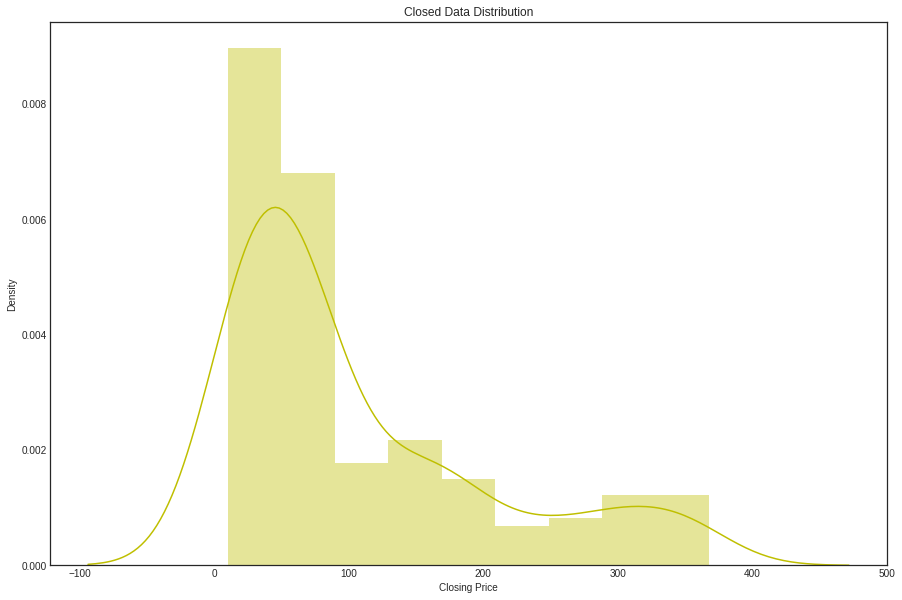

In [9]:
#Dependent variable 'Closing price'
plt.figure(figsize=(15,10))            #we use distplot() to plot a histogram of closing prices for each day.
sns.distplot(df['Close'],color="y")    #then color our histogram using y as the color variable so that we can see which days are closed and which are open.
                                       #Finally, we use plt.title() to create a title for our graph and plt.xlabel() to label our x-axis with "Closing Price".
                                       #The code will plot the distribution of closing prices for the stock market.//
plt.title('Closed Data Distribution')
plt.xlabel('Closing Price')
plt.show()

In [10]:
#visualizing the data
fig = px.line(df, df['Date'], df['Close'], title='Monthly closing price')
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Closing price'),
    autosize=False,
    width=1400,
    height=400)

fig.show()

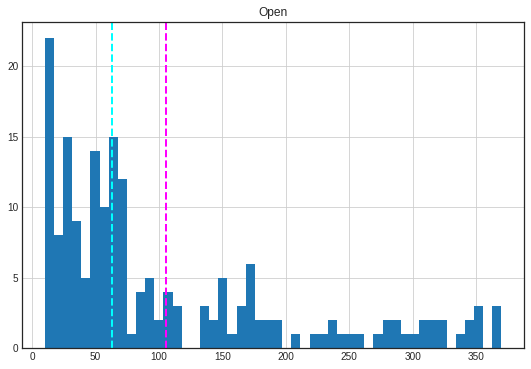

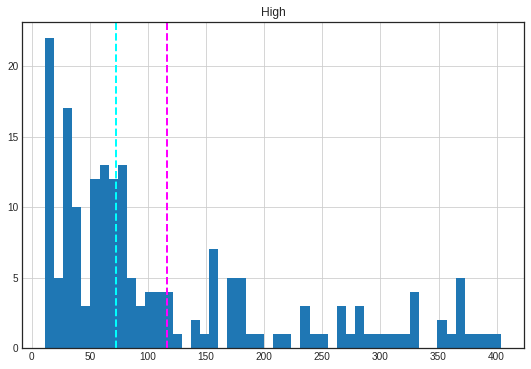

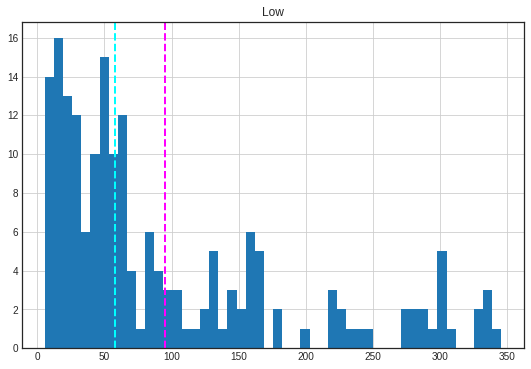

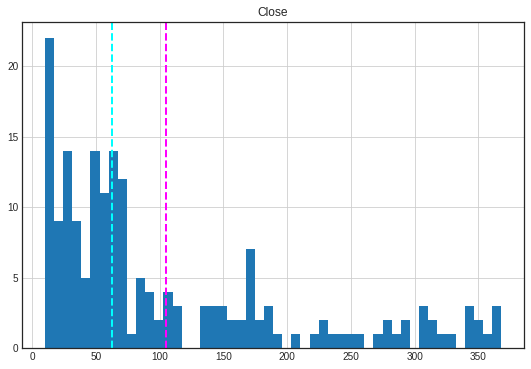

In [11]:
#Checking for skewness in the dataset
numeric_features = df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

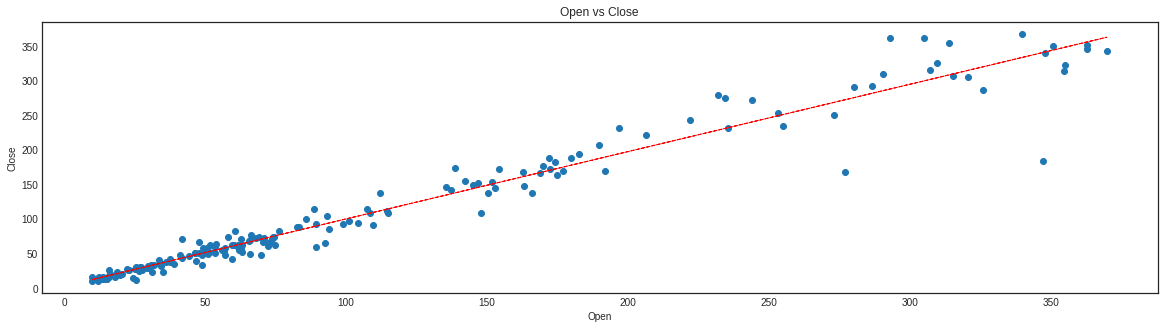

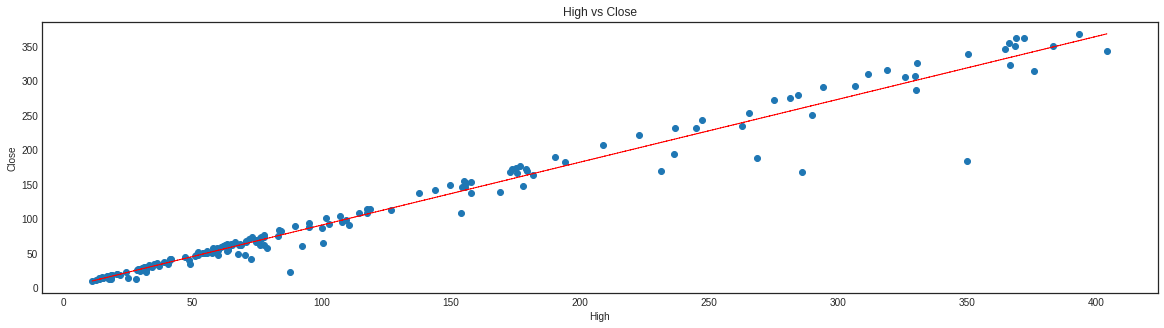

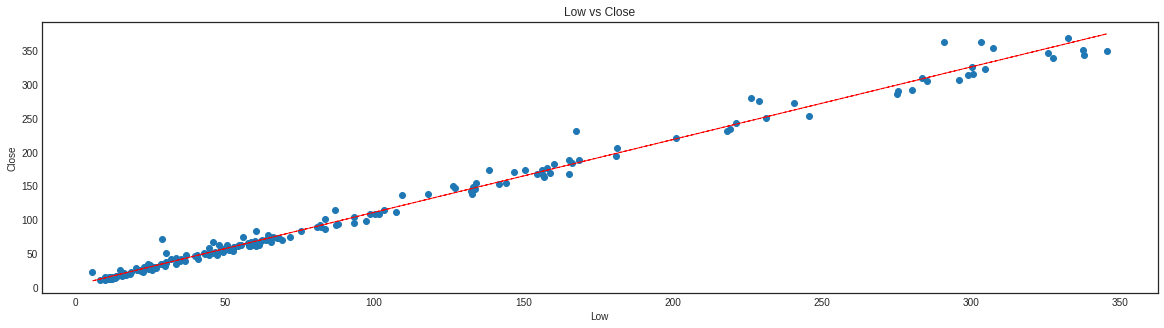

In [12]:
#scatter plot for the relationship between dependent & independent variables
for col in df.describe().columns[:-1]:
  fig = plt.figure(figsize=(20,5))
  ax = fig.gca()
  plt.scatter(df[col], df['Close'])
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} vs Close'.format(col))
  z = np.polyfit(df[col], df['Close'], 1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, "r--", lw=1)
  plt.show()

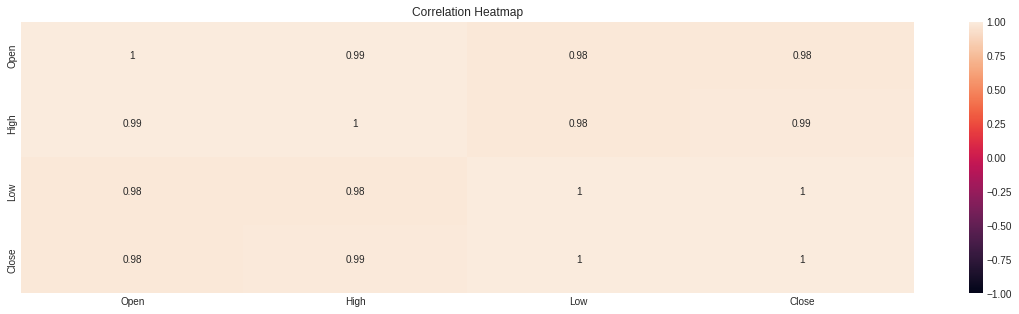

In [13]:
#checking for existence of corelation
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
cor = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=None, annot=True )

Because every feature has a high degree of coherence, using either one feature or the average of all the features would be sufficient for our regression model because linear regression presupposes that the features are not multicolinear.

# Feature Engineering


In [14]:

# Creating a new feature based on average of other features in the dataset
df['OHL'] = df[['Open', 'High', 'Low']].mean(axis=1).round(2)
df.head()

,Date,Open,High,Low,Close,OHL
0,2005-07-01,13.00,14.00,11.25,12.46,12.75
1,2005-08-01,12.58,14.88,12.55,13.42,13.34
2,2005-09-01,13.48,14.87,12.27,13.30,13.54
3,2005-10-01,13.20,14.47,12.40,12.99,13.36
4,2005-11-01,13.35,13.88,12.88,13.41,13.37


Linear regression also presupposes a linear relationship between the target variables and the independent variables; using a scatter plot, we may see if such a relationship exists.

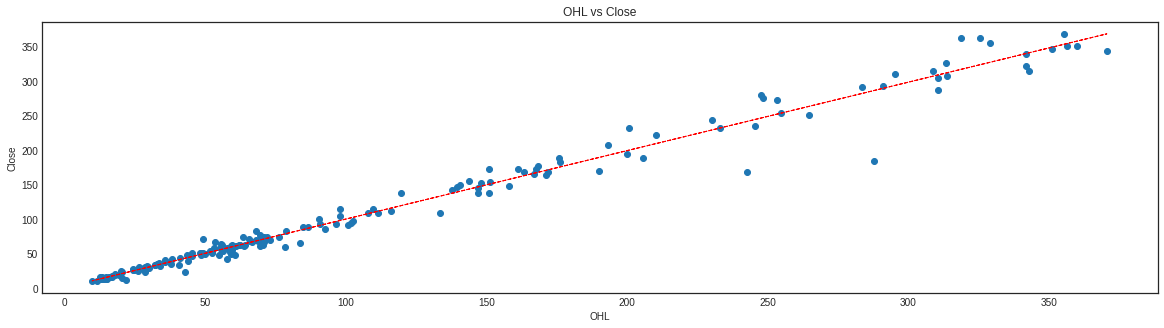

In [15]:
# scatter plot to see the relationship between dependent & independent variables
fig = plt.figure(figsize=(20,5))
ax = fig.gca()
plt.scatter(df['OHL'], df['Close'])
plt.xlabel('OHL')
plt.ylabel('Close')
ax.set_title('OHL vs Close')
z = np.polyfit(df['OHL'], df['Close'], 1)
y_hat = np.poly1d(z)(df['OHL'])
plt.plot(df['OHL'], y_hat, "r--", lw=1)
plt.show()
     

In [16]:
# use lags as additional features
for i in range(1, 13):
    df["lag_{}".format(i)] = df.OHL.shift(i) 

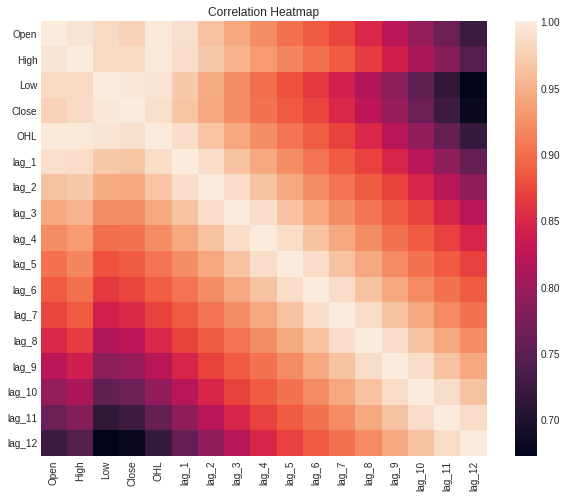

In [17]:
# correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()

To reduce multicollinearity, we can employ regularisation, which involves keeping all of the characteristics but reducing the size of the model's coefficients. When each predictor contributes to predicting the dependent variable, this is a good solution.

# **Train-Test Split**

In [18]:
# 5 fold time-series cross-validation 
tscv = TimeSeriesSplit(n_splits=5)
     

In [19]:
# function for splitting time-series dataset
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    scaler = StandardScaler()
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [20]:

# choose appropriate dependent and independent variables
y = df.dropna().Close
X = df.dropna().drop(['Date','Close','Open','High','Low'], axis=1)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.2)

# **Model Building**

# Implementing linear regression model


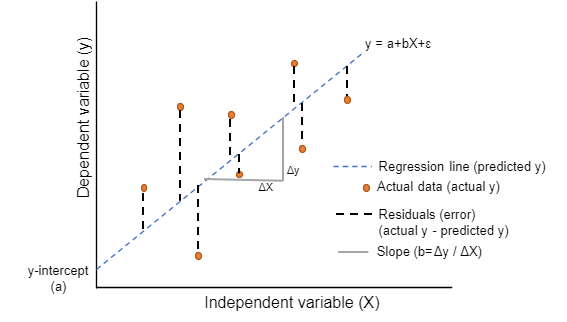

In [21]:
# initialize and fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

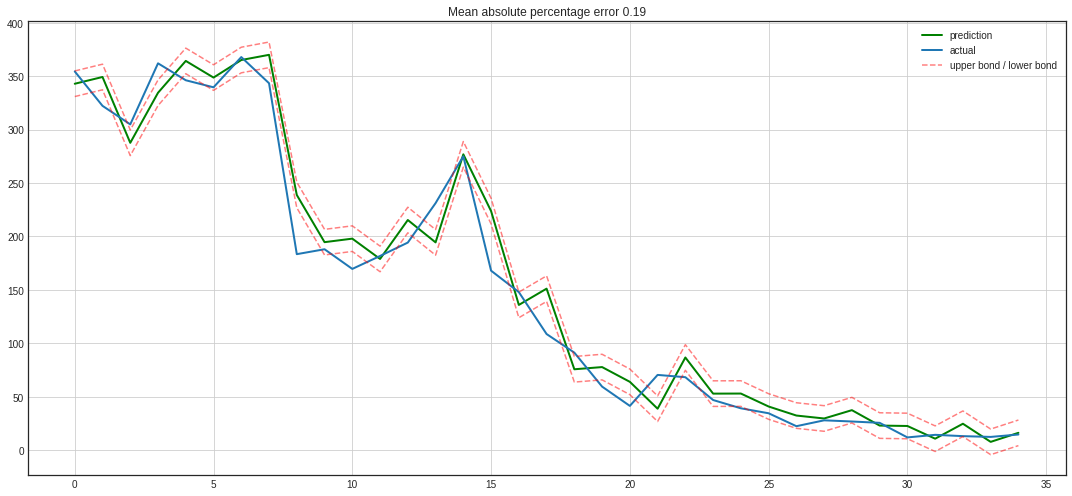

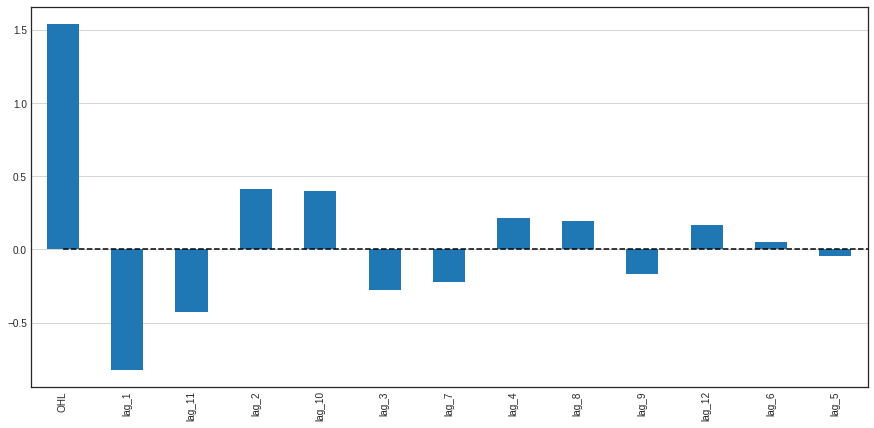

In [22]:
# function to plot model performance
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

# function to plot coefficients   
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed')

plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

mean absolute error: 16.93

mean squared error: 486.35

root mean squared error: 22.05

r2_score: 0.97

mean absolute percentage error: 0.19





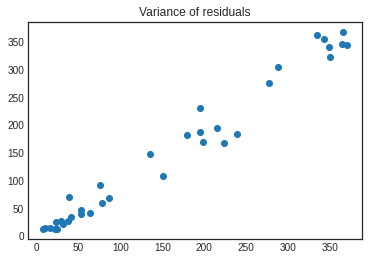

In [23]:

# make predictions
lr_y_pred = lr.predict(X_test)

# evaluate predictions
lr_mae = round(mean_absolute_error(y_test, lr_y_pred),2)
print('mean absolute error: {}\n'.format(lr_mae))
lr_mse = round(mean_squared_error(y_test, lr_y_pred),2)
print('mean squared error: {}\n'.format(lr_mse))
lr_rmse = round(np.sqrt(lr_mse),2)
print('root mean squared error: {}\n'.format(lr_rmse))
lr_r2 = round(r2_score(y_test, lr_y_pred),2)
print('r2_score: {}\n'.format(lr_r2))
lr_mape = round(mean_absolute_percentage_error(lr_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(lr_mape))

# Check for homoscadacity
plt.scatter(lr_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

# Implementing ridge regression

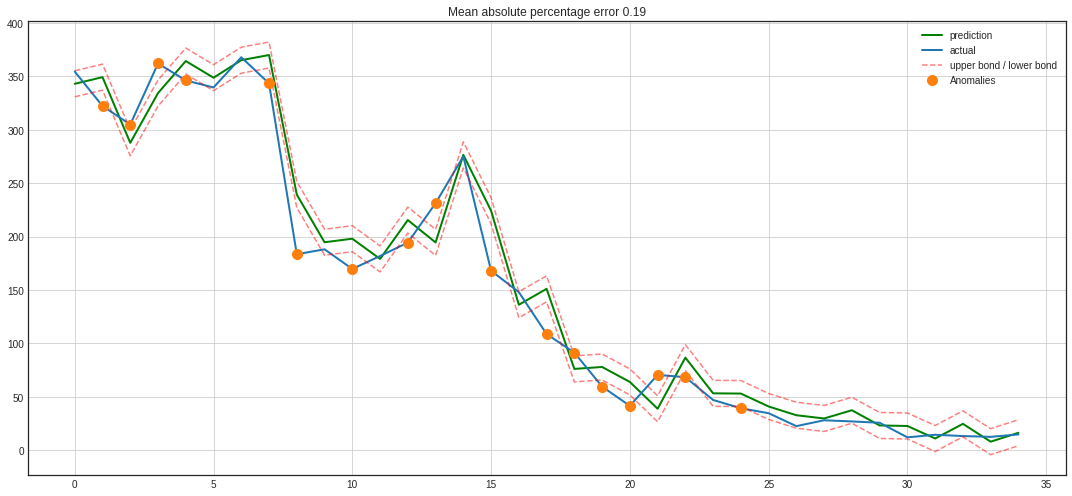

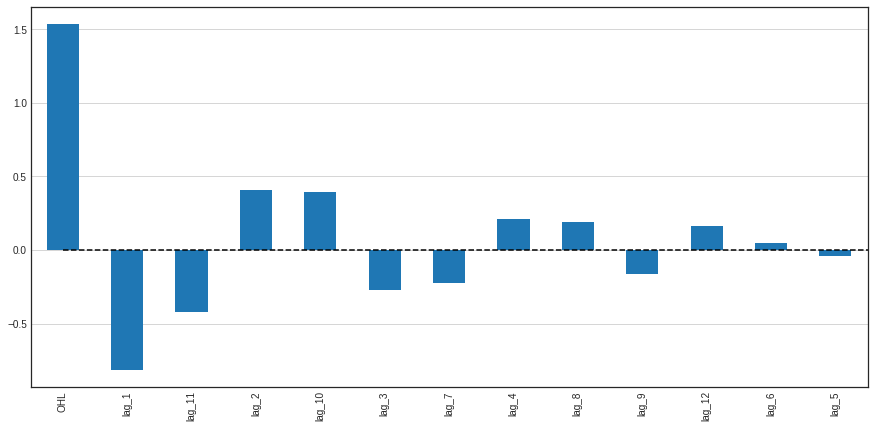

In [24]:
# initialize and fit ridge regression
ridge = RidgeCV(cv=tscv)
ridge.fit(X_train, y_train)

plotModelResults(ridge, 
                 X_train, 
                 X_test, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

mean absolute error: 16.91

mean squared error: 488.09

root mean squared error: 22.09

r2_score: 0.97

mean absolute percentage error: 0.19





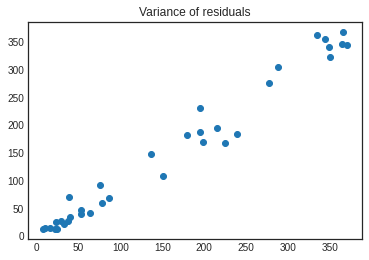

In [25]:
# make predictions
r_y_pred = ridge.predict(X_test)

# evaluate predictions
r_mae = round(mean_absolute_error(r_y_pred, y_test),2)
print('mean absolute error: {}\n'.format(r_mae))
r_mse = round(mean_squared_error(r_y_pred, y_test),2)
print('mean squared error: {}\n'.format(r_mse))
r_rmse = round(np.sqrt(r_mse),2)
print('root mean squared error: {}\n'.format(r_rmse))
r_r2 = round(r2_score(r_y_pred, y_test),2)
print('r2_score: {}\n'.format(r_r2))
r_mape = round(mean_absolute_percentage_error(r_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(r_mape))

# Check for homoscadacity
plt.scatter(r_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

#Implementing lasso regression

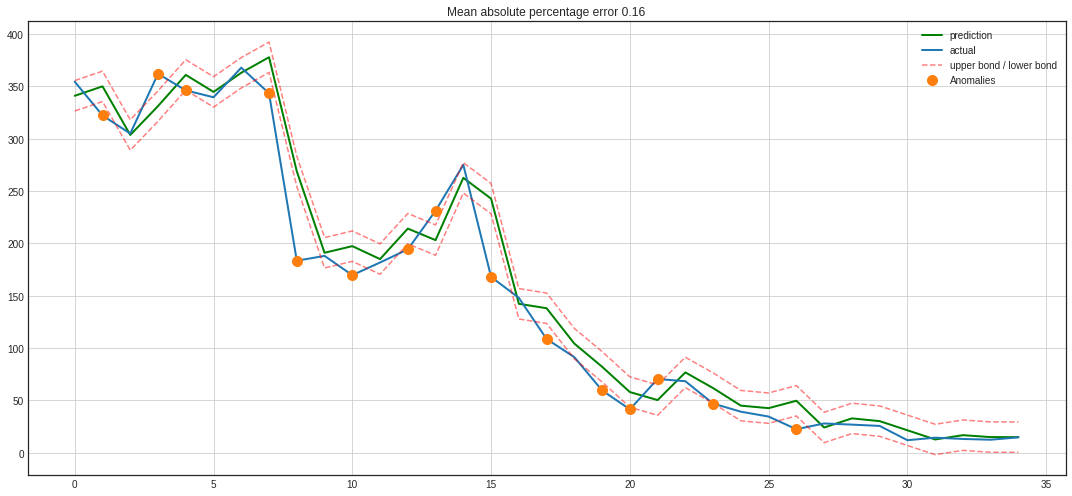

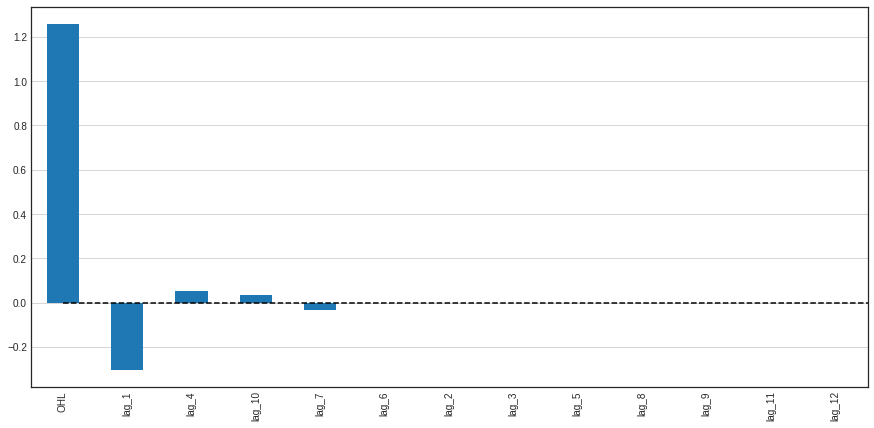

In [26]:
# initialize and fit lasso regression
lasso = LassoCV(cv=tscv)
lasso.fit(X_train, y_train)

plotModelResults(lasso, 
                 X_train, 
                 X_test, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)




mean absolute error: 16.87

mean squared error: 626.48

root mean squared error: 25.03

r2_score: 0.96

mean absolute percentage error: 0.16





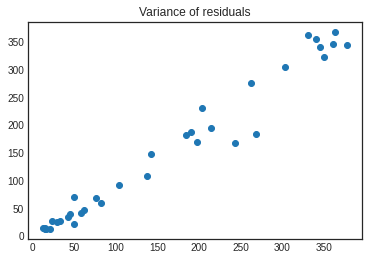

In [27]:
# make predictions
l_y_pred = lasso.predict(X_test)

# evaluate predictions
l_mae = round(mean_absolute_error(y_test, l_y_pred),2)
print('mean absolute error: {}\n'.format(l_mae))
l_mse = round(mean_squared_error(y_test, l_y_pred),2)
print('mean squared error: {}\n'.format(l_mse))
l_rmse = round(np.sqrt(l_mse),2)
print('root mean squared error: {}\n'.format(l_rmse))
l_r2 = round(r2_score(y_test, l_y_pred),2)
print('r2_score: {}\n'.format(l_r2))
l_mape = round(mean_absolute_percentage_error(l_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(l_mape))

# Check for homoscadacity
plt.scatter(l_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

#Implementing elasticnet regression

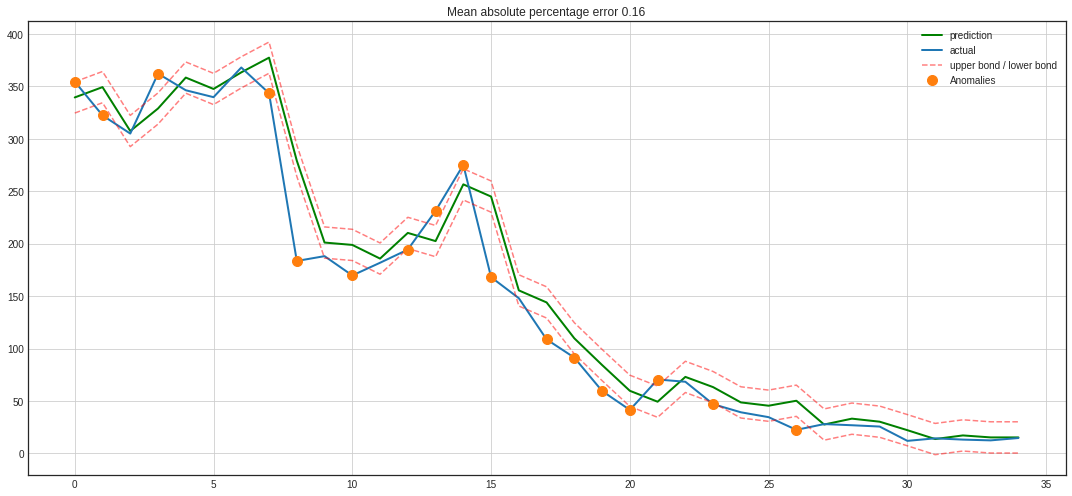

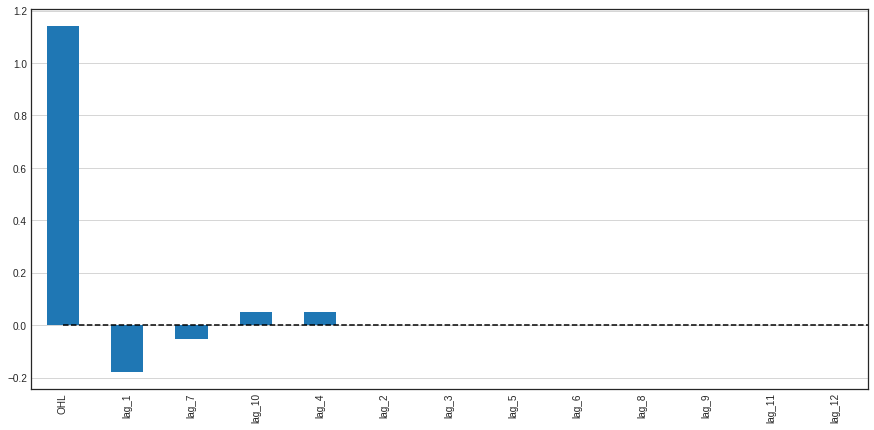

In [28]:
# initialize and fit elasticnet regression
elasticnet = ElasticNetCV(cv=tscv)
elasticnet.fit(X_train, y_train)

plotModelResults(elasticnet, 
                 X_train, 
                 X_test, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(elasticnet)

mean absolute error: 16.87

mean squared error: 626.48

root mean squared error: 25.03

r2_score: 0.96

mean absolute percentage error: 0.16





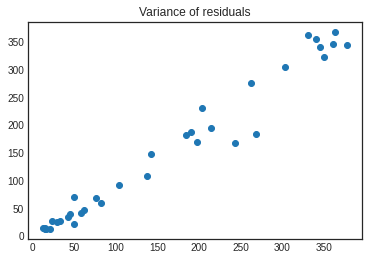

In [29]:
# make predictions
l_y_pred = lasso.predict(X_test)

# evaluate predictions
l_mae = round(mean_absolute_error(y_test, l_y_pred),2)
print('mean absolute error: {}\n'.format(l_mae))
l_mse = round(mean_squared_error(y_test, l_y_pred),2)
print('mean squared error: {}\n'.format(l_mse))
l_rmse = round(np.sqrt(l_mse),2)
print('root mean squared error: {}\n'.format(l_rmse))
l_r2 = round(r2_score(y_test, l_y_pred),2)
print('r2_score: {}\n'.format(l_r2))
l_mape = round(mean_absolute_percentage_error(l_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(l_mape))

# Check for homoscadacity
plt.scatter(l_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

#Evaluation Summary


In [67]:
# set up the model pipeline
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

#Implementing Random Forest Regressor

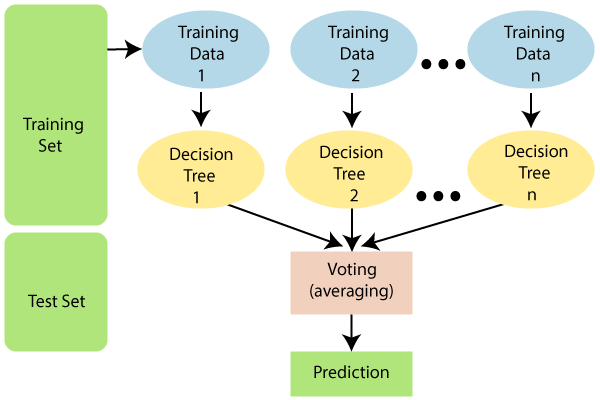

In [68]:
#initialize and fit random forests regressor
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100,150,200],
     'max_depth': [20,30,50,100]
}
start = datetime.now()
model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=tscv)
end = datetime.now()
execution_time = round((end - start).seconds/60,2)
print(f'The computational cost for finding the best fit random forest regressor model: {execution_time} minutes\n')
# Root Mean Squared Error
print(f'Best score: {np.sqrt(-model.best_score_)}\n')
print(f'Best parameters: {model.best_params_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The computational cost for finding the best fit random forest regressor model: 0.22 minutes

Best score: 58.51687169874507

Best parameters: {'max_depth': 30, 'n_estimators': 200}


In [69]:
# best fit model
rfr = model.best_estimator_

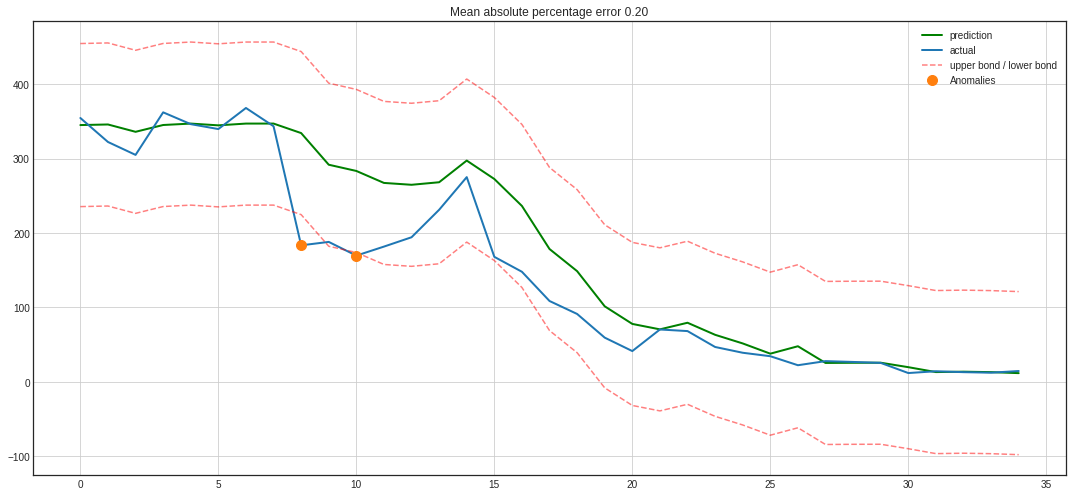

In [70]:
# evaluate the model
plotModelResults(rfr, 
                 X_train, 
                 X_test, 
                 plot_intervals=True, plot_anomalies=True)

#Implementing XGBoost Regressor

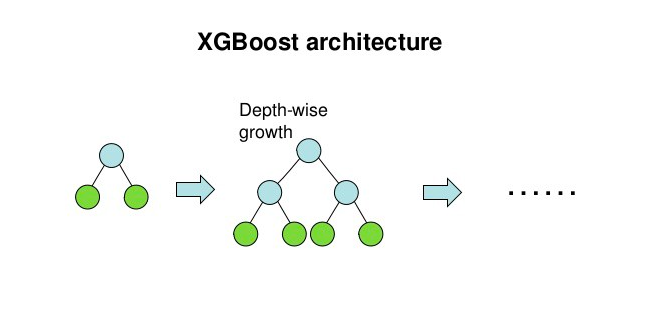

In [71]:
# initialize and fit xgboost regressor
model = XGBRegressor()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}
start = datetime.now()
model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=tscv)
end = datetime.now()
execution_time = round((end - start).seconds/60,2)
print(f'The computational cost for finding the best fit XGBoost regressor model: {execution_time} minutes\n')
# Root Mean Squared Error
print(f'Best score: {np.sqrt(-model.best_score_)}\n')
print(f'Best parameters: {model.best_params_}')
     

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[19:56:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The computational cost for finding the best fit XGBoost regressor model: 3.05 minutes

Best score: 66.07007559384817

Best parameters: {'colsample_bytree': 0.8, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.8}


In [72]:
#best fit model
xgb = model.best_estimator_

[19:56:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


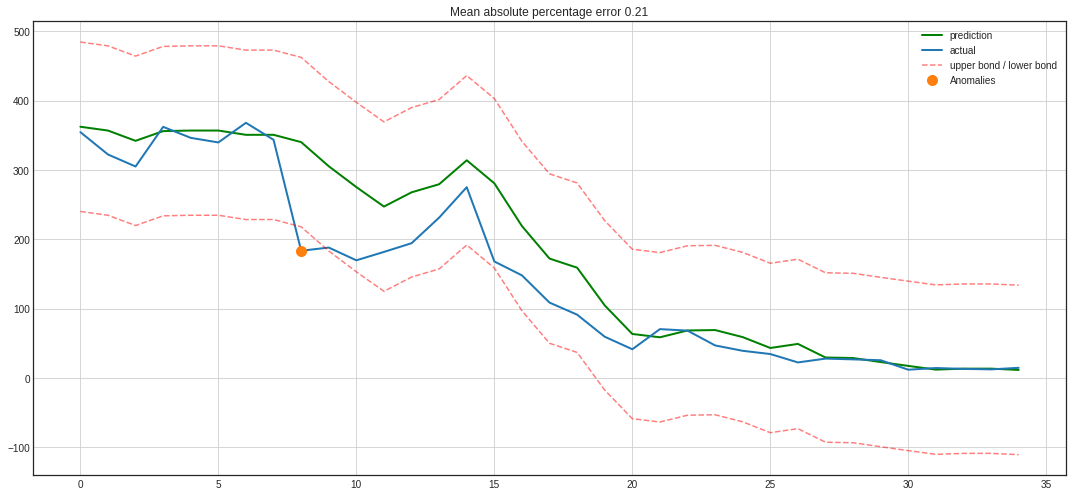

In [73]:
#evaluate the model
plotModelResults(xgb, 
                 X_train, 
                 X_test, 
                 plot_intervals=True, plot_anomalies=True)

#Implementing Support Vector Regressor

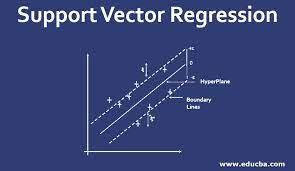

In [75]:
# initialize and fit support vector regressor
model = SVR()
param_grid = {
    'C': [0.1, 1, 10, 100],   
    'kernel': ['rbf']
}
start = datetime.now()
model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=tscv)
end = datetime.now()
execution_time = round((end - start).seconds/60,2)
print(f'The computational cost for finding the best fit SVR model: {execution_time} minutes\n')
# Root Mean Squared Error
print(f'Best score: {np.sqrt(-model.best_score_)}\n')
print(f'Best parameters: {model.best_params_}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The computational cost for finding the best fit SVR model: 0.0 minutes

Best score: 89.24735610091432

Best parameters: {'C': 10, 'kernel': 'rbf'}


In [76]:
#best fit model
svr = model.best_estimator_

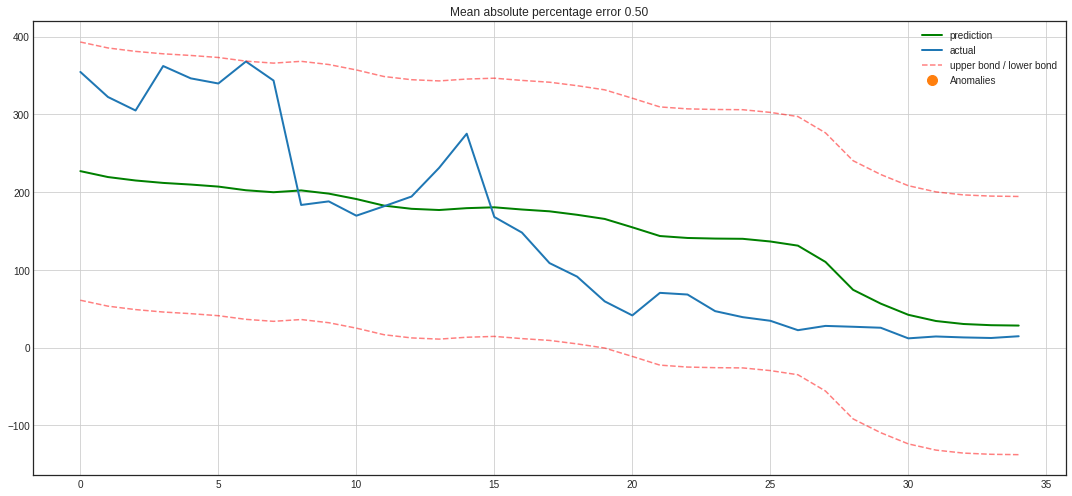

In [77]:
#evaluate the model
plotModelResults(svr, 
                 X_train, 
                 X_test, 
                 plot_intervals=True, plot_anomalies=True)

#Time Series Analysis

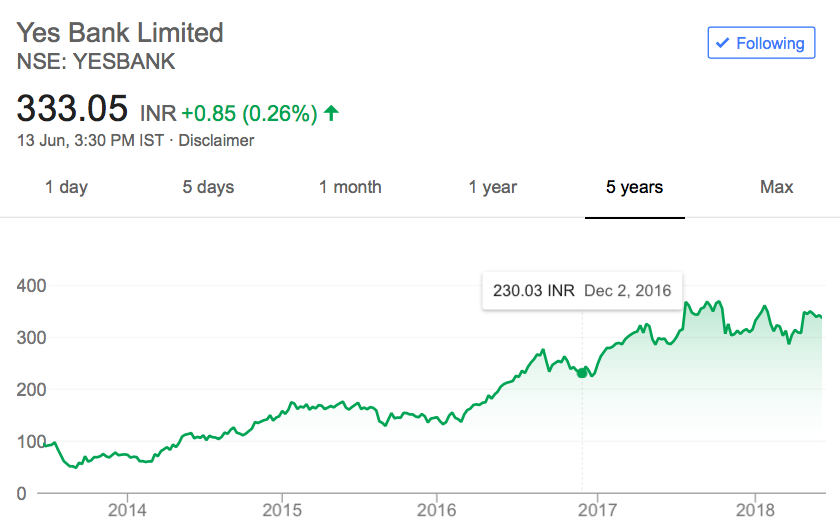

# Moving Average

A moving average much better than a naive forecast (y^t=yt−1). A moving average is the average of previous k values.


y^t=1k∑n=1kyt−n

In [39]:
# function for calculating moving average

def moving_average(series, n):
  
  """
  Calculate average of last n observation
  """
  
  return round(np.average(series[-n:]),2)

moving_average(df['Close'],12) # prediction for next month closing price using observed previous 12 months data

24.18

Unfortunately we can make only one prediction, to make further predictions we need to have the actual observed values. However moving average can be used to identify the trends by smoothing the time series using a pandas implementation 


DataFrame.rolling(window).mean().

In [40]:
# # set back up the date column
# df = df.reset_index()
# df['Date'] = df_date

# function for plotting moving average
def ma(series, window, plot_intervals=False):

  """
  series - dataframe column with timeseries
  window - rolling window size
  """

  rolling_mean = series.rolling(window=window).mean()

  plt.figure(figsize=(20,5))
  plt.title('Moving average \n window size = {}'.format(window))
  plt.plot(df['Date'], rolling_mean, "g", label = "Rolling mean trend")
  
  # plotting confidence intervals
  if plot_intervals:
    mae = mean_absolute_error(series[window:], rolling_mean[window:])
    deviation = np.std(series[window] - rolling_mean[window:])
    lower_bound = rolling_mean - (mae + deviation)
    upper_bound = rolling_mean + (mae + deviation)
    plt.plot(df['Date'], lower_bound, "r--", label = "Upper/Lower bounds")
    plt.plot(df['Date'], upper_bound, "r--")
  
  plt.plot(df['Date'], series, label = "Actual values")
  plt.legend(loc="upper left")
  plt.grid(True)
  plt.show()

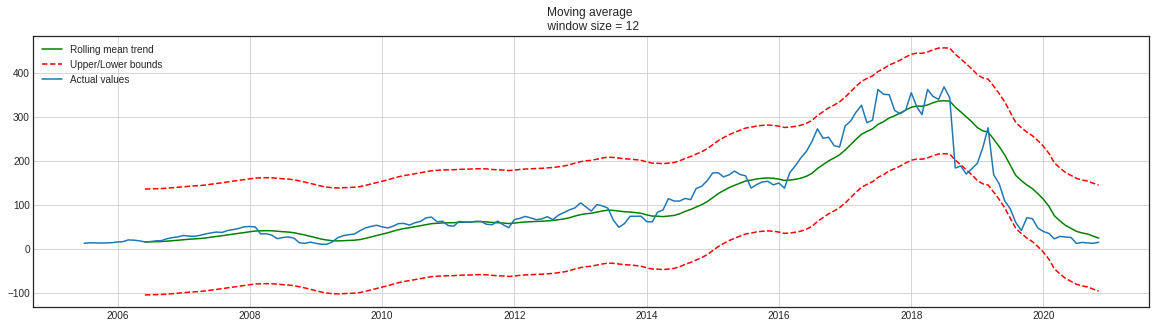

In [41]:
# plotting 12 months moving average 
ma(df['Close'],12, plot_intervals=True) # smoothing by previous 12 months

In [42]:
# function that returns weighted moving average
def wma(series, weights):
  """
  calculate weighted moving average of the series
  """
  result = 0.0
  for w in range(len(weights)):
    result += series.iloc[-w-1] * weights[w]
    return float(result)

wma(df['Close'], weights = [0.5, 0.3, 0.2])

7.335

#Now let's extend this concept of weighted averages to exponentially weighted moving averages

Exponentially weighted moving averages weights all the available observations while exponentially decreasing the weights as we move back  k  values

y^t+1=α⋅yt+α(1−α)⋅yt−1+α(1−α)2⋅yt−2+α(1−α)3⋅yt−3+.... 

y^t+1=α⋅yt+(1−α)⋅y^t





In [43]:
# function that does exponential smoothing
def exponential_smoothing(series, alpha):
  """
  series - dataframe column with timeseries
  alpha - smoothing parameter
  """
  result = [series[0]]
  for n in range(len(series)):
    result.append(alpha * series[n] + (1 - alpha) * result[n-1])
  return result

In [44]:
# function to plot exponentail moving averages
def ema(series, alphas):
  """
  series - dataframe colummn with time series
  alpha - smoothing parameters
  """
  with plt.style.context('seaborn-white'):
    plt.figure(figsize=(20,5))
    for alpha in alphas:
      plt.plot(exponential_smoothing(series, alpha), label = "Alpha{}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.legend(loc="best")
    plt.grid(True)

In [45]:
# make prediction
round(exponential_smoothing(df['Close'], alpha=0.2)[-1],2)

53.87

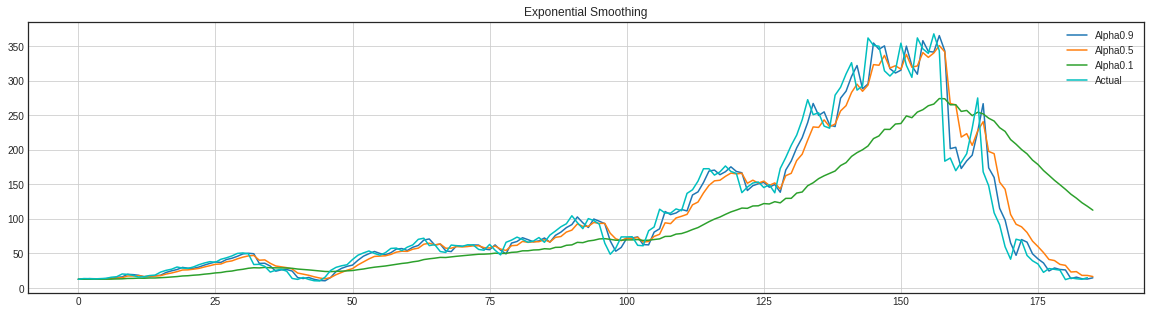

In [46]:
# plot ema
ema(df['Close'], [0.9, 0.5, 0.1])

# Holt's linear trend method (Double exponential smoothing)

So far we were able to make just one prediction, clearly which is isn't enough. Double exponential smoothing (Holt's linear trend method) is one such way to overcome this limitation. It has two components, intercept  l  and slope  b 

ℓx=αyx+(1−α)(ℓx−1+bx−1) 
 
 bx=β(ℓx−ℓx−1)+(1−β)bx−1 

y^x+1=ℓx+ bx 

The final prediction is the sum of the model values of the intercept and trend.

In [47]:
# function that does double exponential smoothing
def double_exponential_smoothing(series, horizon, alpha, beta):
  """
  series - dataframe column with timeseries
  alpha - smoothing parameter for level
  beta - smoothing parameter for trend
  """
  # first value is same as series
  result = [series[0]]
  for n in range(1, len(series)+horizon):
      if n == 1:
          level, trend = series[0], series[1] - series[0]
      if n >= len(series): 
          value = result[-1]
      else:
          value = series[n]
      last_level, level = level, alpha*value + (1-alpha)*(level+trend)
      trend = beta*(level-last_level) + (1-beta)*trend
      result.append((level+trend).round(2))
  print(result[-horizon:])
  return result

In [48]:
# function to plot dema
def dema(series, horizon, alpha, beta):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataframe column with timeseries
        alphas - smoothing parameters for level
        betas - smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 5))
        plt.plot(double_exponential_smoothing(series, horizon, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

# Predictions by various combinations of alphas and betas

[28.47, 29.2, 29.93, 30.66, 31.39, 32.12]
[23.76, 22.37, 20.98, 19.59, 18.2, 16.81]
[14.17, 8.22, 2.27, -3.68, -9.63, -15.58]
[18.8, 18.44, 18.08, 17.72, 17.36, 17.0]
[34.31, 41.52, 48.73, 55.95, 63.16, 70.37]


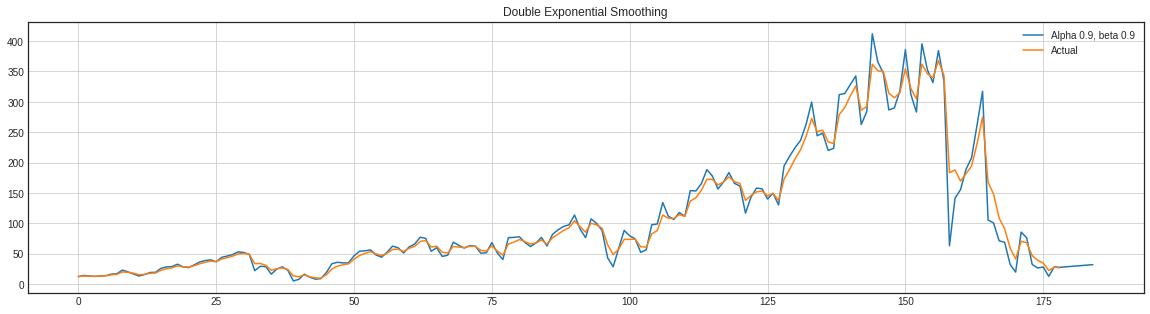

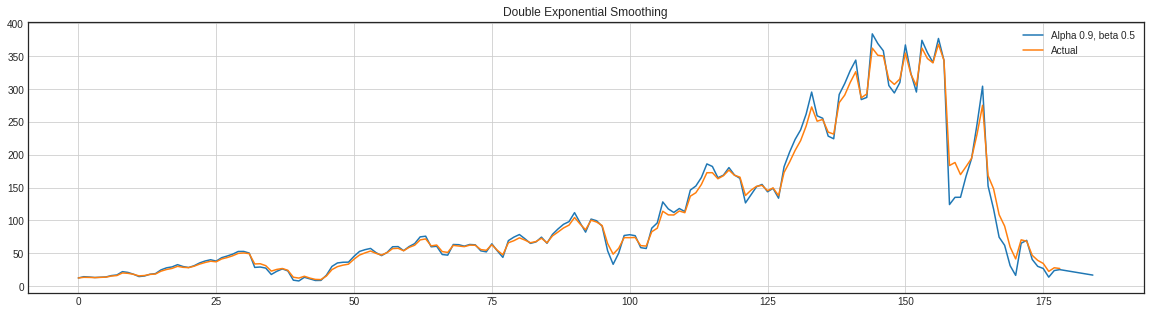

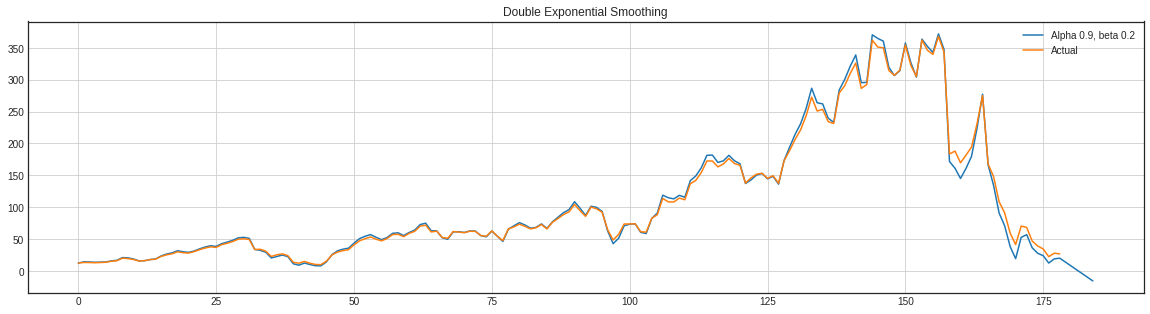

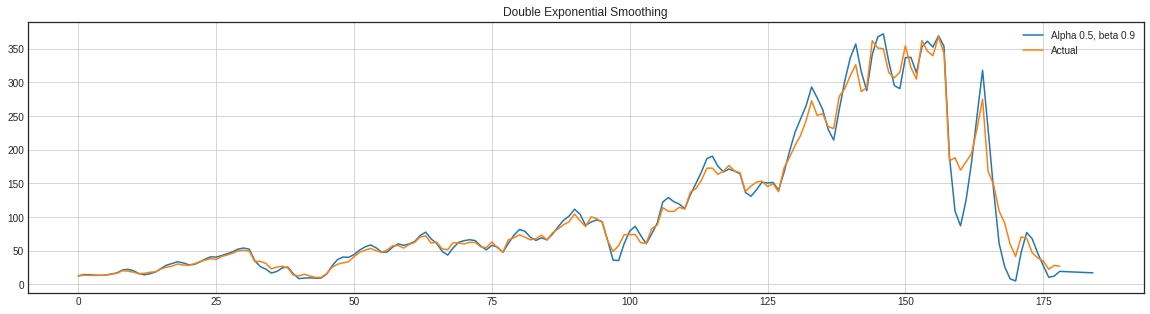

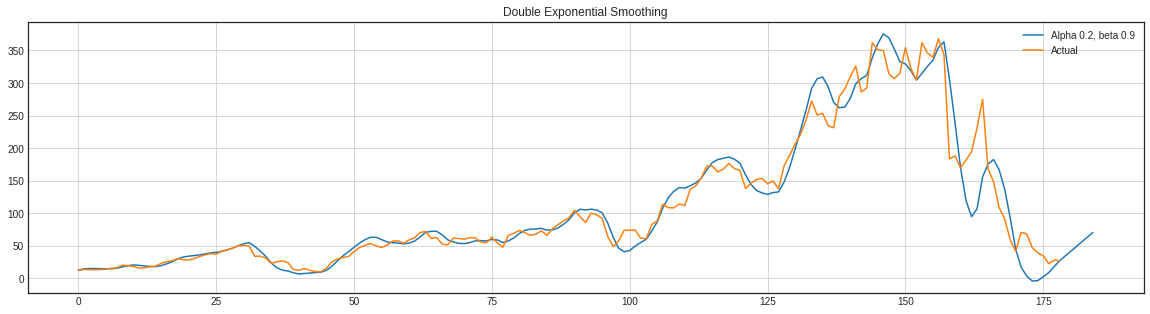

In [49]:
# Try multiple values of alpha and beta
combinations = [(0.9,0.9), (0.9, 0.5), (0.9, 0.2), (0.5, 0.9), (0.2, 0.9)]
for alpha, beta in combinations:
  dema(df['Close'][0:179], 6, alpha, beta)

# Stationarity

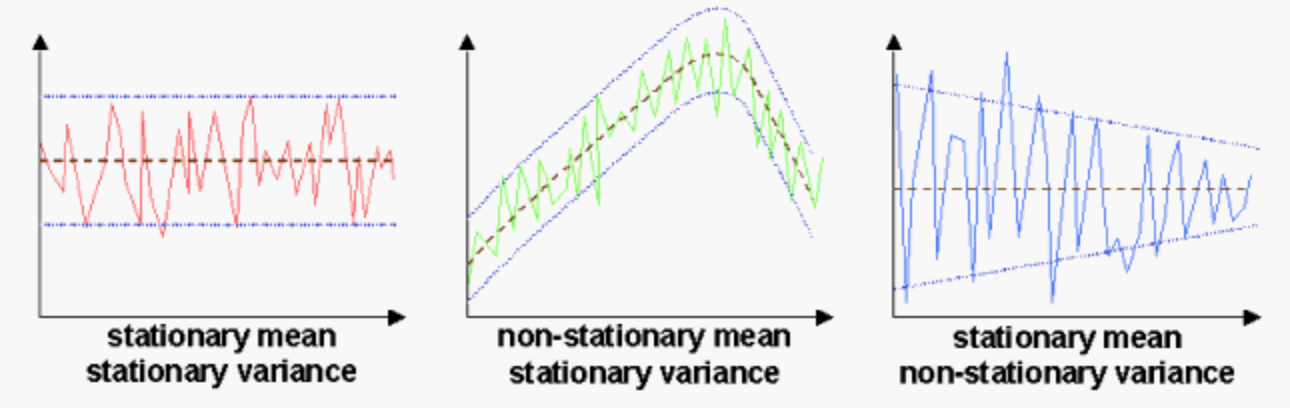

To make predictions, any time series must be stationary. If a process's statistical features, such as mean and variance, do not change over time, it is said to be stationary. Visual inspections or the Dickey-Fuller test are two methods for determining stationarity. The null hypothesis is that the time series cannot be represented by a unit root and is thus not stationary (has some time-dependent structure). The time series is steady, according to the alternative hypothesis (which rejects the null hypothesis).

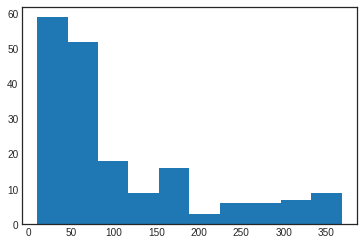

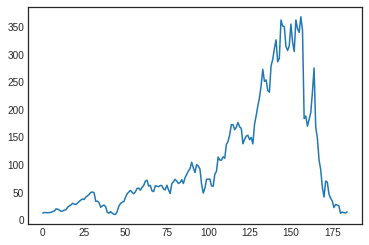

In [50]:
# visual inspection
X = df['Close']
plt.hist(X)
plt.show()
plt.plot(X)
plt.show()

In [51]:
# Implement Dickey-Fuller test
X = df['Close'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.906409
p-value: 0.329052
Critical Values:
	1%: -3.469
	5%: -2.879
	10%: -2.576


Because the ADF statistic is bigger than all of our critical values, we cannot reject the null hypothesis. It has been established that our time series model is not stationary. We'll make it immobile in order to develop an ARIMA model and then forecast the future.

#ARIMA Implementation

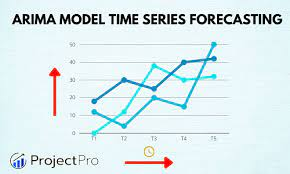

#Getting rid of non stationarity

In [52]:
# function to take lags
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

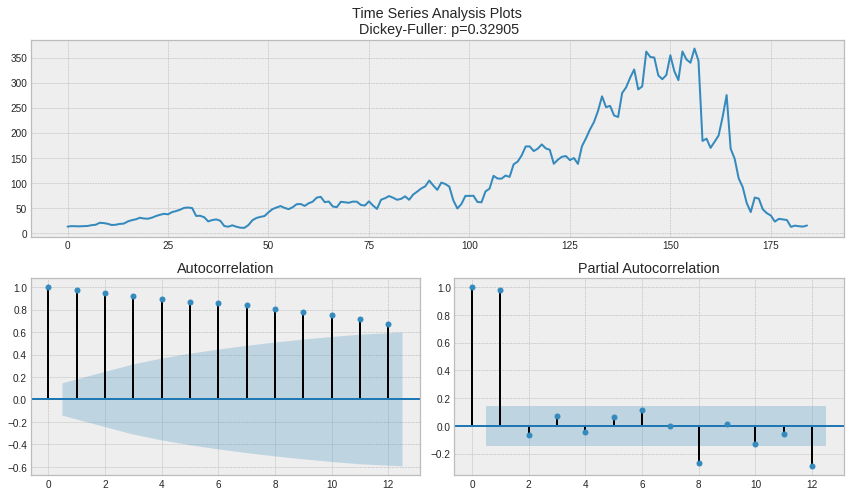

In [53]:
# plot to check stationarity
tsplot(df['Close'], lags=12)

There are still too many substantial lags in the autocorrelation function. To get rid of them, subtract the series from itself with lag 1.

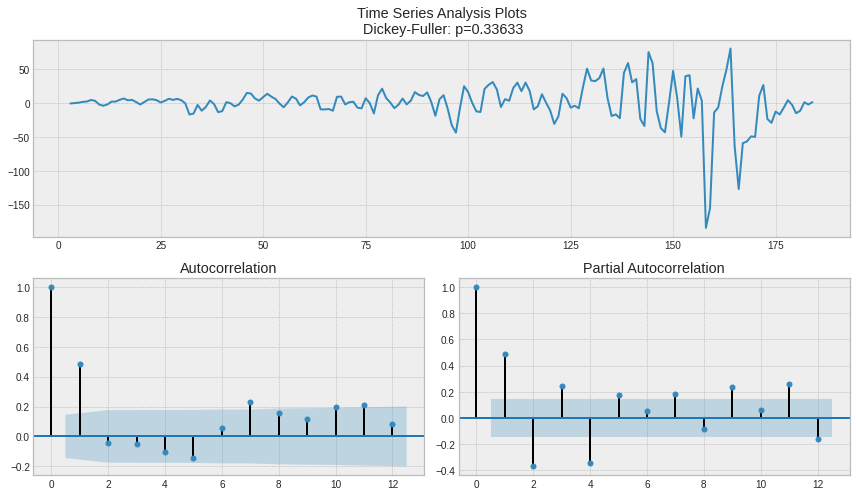

In [54]:
# differnce transform
diff = df['Close'] - df['Close'].shift(2)
tsplot(diff[3:], lags=12)

ARIMA - Parameters

p: Trend autoregression order 


d: Trend difference order.

q: Trend moving average order.










*  p  - is most probably 2 since it is the last significant lag on the PACF, after which, most others are not significant.

*   d - equals 1 because we had first differences



*   q - should be somewhere around 7 as well as seen on the ACF






/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  180
Model:                 ARIMA(2, 1, 7)   Log Likelihood                -796.760
Method:                       css-mle   S.D. of innovations             19.459
Date:                Tue, 17 Jan 2023   AIC                           1615.521
Time:                        19:45:20   BIC                           1650.643
Sample:                             1   HQIC                          1629.761
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0692      0.053     -1.312      0.189      -0.173       0.034
ar.L1.D.Close     0.0495      0.057      0.862      0.389      -0.063       0.162
ar.L2.D.Close    -0.8507      0.049    -

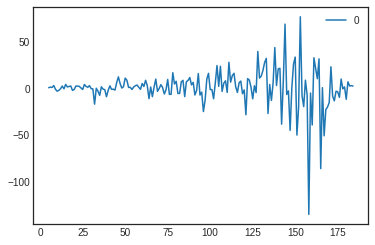

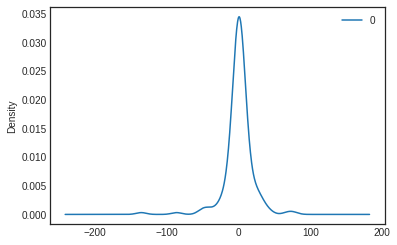

                0
count  180.000000
mean     0.699859
std     19.772918
min   -134.973361
25%     -3.872621
50%      1.353967
75%      7.002415
max     76.628469


In [55]:
# fit model
model = ARIMA(diff[4:], order=(2,1,7))
model = model.fit()

# summary of fit model
print(model.summary())

# line plot of residuals
residuals = pd.DataFrame(model.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())



In [56]:
# create series
diff = pd.Series(data=diff[5:])
diff1 = [0]*5
for i in diff:
  diff1.append(i*(-1)) 
diff1 = pd.Series(data=diff1)
diff1 = diff1[5:]

In [57]:
# plot MAPE of ARIMA
def plotARIMA(series, model, n_steps, d=1):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted ARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    # data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on d steps from the beginning
    error = mean_absolute_percentage_error(diff1[d:], data['arima_model'][d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.plot(diff1, label="actual")
    plt.legend()
    plt.grid(True);

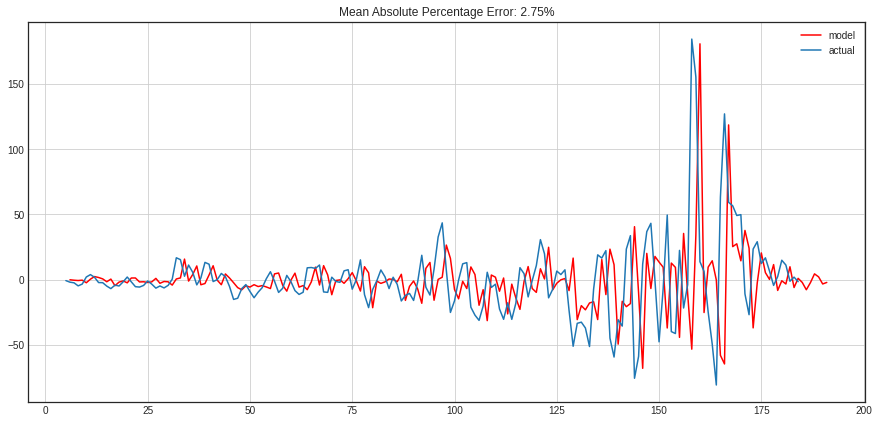

In [58]:
# model predictions vs actual
plotARIMA(diff1, model, 6)

#Prophet Implementation

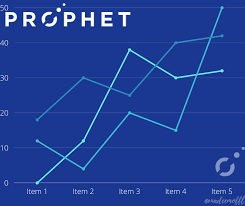

In [59]:
# set data to train and test
dfp = df[['Date','Close']][175:]
split_date = '2020-05-01'
df_train = dfp.loc[dfp['Date'] <= split_date].copy()
df_test = dfp.loc[dfp['Date'] > split_date].copy()

In [60]:
# rename columns appropriately
df_train = df_train.rename(columns={'Date':'ds','Close':'y'})
df_test = df_test.rename(columns={'Date':'ds','Close':'y'})

# select appropriate columns
df_test = df_test.drop(columns=['y'], axis=1)
df_test.reset_index(inplace=True)
df_test.drop(columns=['index'], axis=1, inplace=True)

In [61]:
# actual closing prices
df[179:][['Date','Close']]

,Date,Close
179,2020-06-01,25.60
180,2020-07-01,11.95
181,2020-08-01,14.37
182,2020-09-01,13.15
183,2020-10-01,12.42
184,2020-11-01,14.67


#mean absolute error: 4.57

mean squared error: 30.32

root mean squared error: 5.51

r2_score: -0.38

mean absolute percentage error: 0.16

#Conclusion

•	We began with data inspection, then examined the data distribution, looked for correlation, and used averaged characteristics to remove it.

•	Accuracy, mean squared error, root mean squared error, r2 score, and mean absolute percentage error were used to evaluate a basic linear regression model.

•	Additional features were created by employing delays and regularisation techniques such as ridge, lasso, and elastic net regression to lessen the effect of multicollinearity.

•	Regression models such as the random forest regressor, the xgboost regressor, and the support vector regressor were created.

•	To do time-series analysis, the time component was introduced and averaging techniques such as moving average, exponentially weighted moving average, and double exponentially weighted moving average were utilised.

•	The presence of nonstationarity was recognised, and it was made stationary by taking lags and differences into account.